# EDA and Pre-processing

## IMPORT LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import math
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to remove warnings
import warnings
warnings.filterwarnings("ignore")

## LOAD DATA

In [24]:
all= pd.read_csv(r'./../data/cleaned_data/filtered_all.csv')

## FUNCTIONS TO VISUALIZE VARIBLES

#### NUMERICALS

In [25]:
# Function to visualize the distribution, mean and median of each continuous variable.
def continous_distribution(df):
    a = math.ceil(df.shape[1]/2)  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize = (14, a*5))
    plt.suptitle("Distribution of Numerical Variables", fontsize = 14, y=1)

    for i in df:
        plt.subplot(a, b, c)
        plt.title('{}'.format(i, a, b, c))
        plt.xlabel(i)
        fig = sns.distplot(df[i])
        fig.axvline(x = np.mean(df[i]), color="red")
        fig.axvline(x = np.median(df[i]), color="green")
        c = c + 1
    
    plt.tight_layout()
    plt.show()

In [26]:
# Function to plot the outliers of variables
def check_outliers(df):
    a = math.ceil(df.shape[1]/2)  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize = (14,a*5))
    plt.suptitle("Plotting Outliers", fontsize = 14, y=1)

    for i in df:
        plt.subplot(a, b, c)
        plt.title('{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(x = df[i])
        c = c + 1
    
    plt.tight_layout()
    plt.show()

In [27]:
# Function to plot the distribution of discrete variables
def plot_distribution(df):
    a = math.ceil(df.shape[1]/2)  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize = (16,a*5))
    plt.suptitle("Distribution of Discrete Numerical Variables", fontsize = 14, y=1)
    sns.set_palette('colorblind')

    for i in df:
        plt.subplot(a, b, c)
        plt.title('{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.countplot(data = df, x = i)
        c = c + 1

    plt.tight_layout()
    plt.show()

## NUMERICAL VARIABLES

In [28]:
all_numericals = all.select_dtypes(np.number)

In [29]:
all_numericals

,greenable,discounted,disc_price,orig_price
0,0,1,139.3,199.0
1,0,0,155.0,155.0
2,0,1,108.0,135.0
3,0,0,215.0,215.0
4,0,1,308.0,440.0
...,...,...,...,...
5873,1,0,55.0,55.0
5874,0,1,39.0,65.0
5875,0,1,54.0,90.0
5876,0,0,35.0,35.0


In [30]:
all_numericals.describe() # we will separate continuous variables from discrete

,greenable,discounted,disc_price,orig_price
count,5878.000000,5878.000000,5878.000000,5878.000000
mean,0.411364,0.602926,140.838329,191.448792
std,0.492123,0.489333,116.959200,147.626770
min,0.000000,0.000000,3.500000,5.000000
25%,0.000000,0.000000,65.000000,85.000000
50%,0.000000,1.000000,105.000000,150.000000
75%,1.000000,1.000000,179.400000,250.000000
max,1.000000,1.000000,970.000000,1095.000000


> **OBSERVATIONS:** 
> - We can see that the minimum and maximum prices have a huge range.
>
> - Only the prices columns are continuous.

In [31]:
# taking continuous variables
continuous = all_numericals.filter(regex="price")

In [32]:
# taking discrete variables
discrete = all_numericals[["greenable", "discounted"]]

In [33]:
continuous.head()

,disc_price,orig_price
0,139.3,199.0
1,155.0,155.0
2,108.0,135.0
3,215.0,215.0
4,308.0,440.0


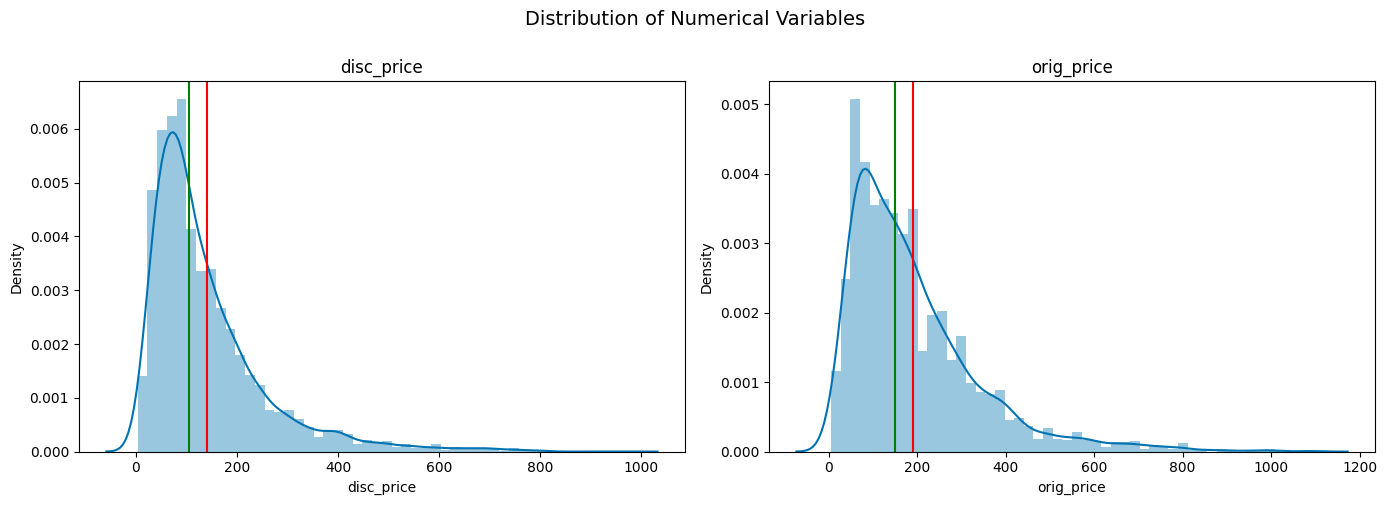

In [34]:
continous_distribution(continuous)

> **OBSERVATION: Prices are skewed to the right. There are some products that are more expensive that the majority.**

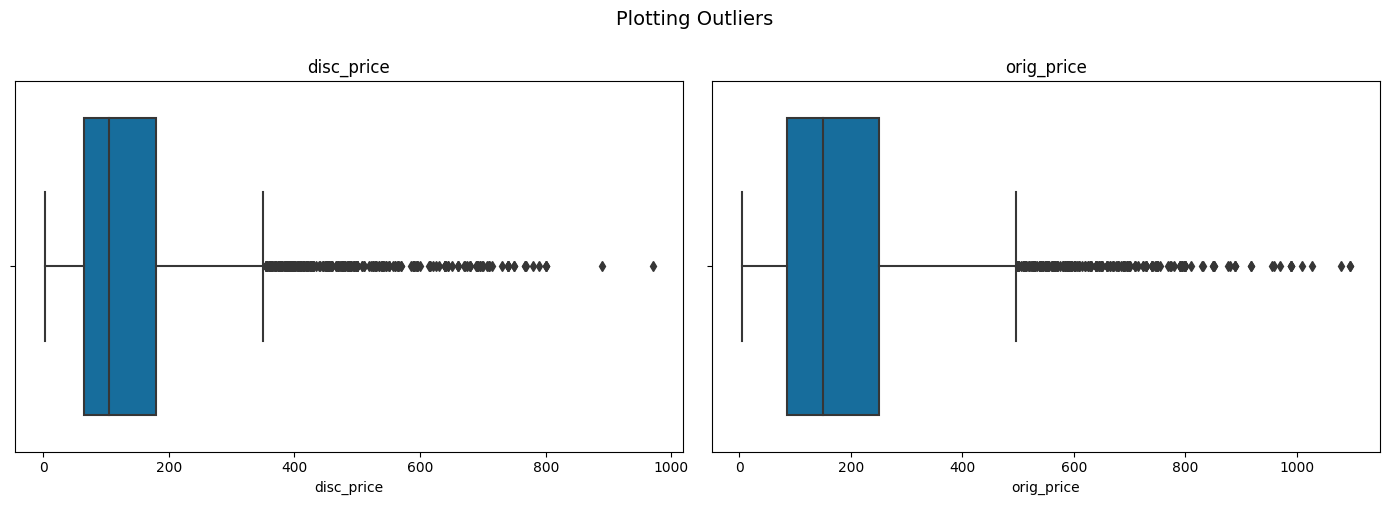

In [35]:
check_outliers(continuous)

> **OBSERVATION: Majority of the products cost less than 200 euros. There are exceptions and outliers that reach over 1000 euros! These products most likely belong to luxury brands or are made with luxurious materials.**

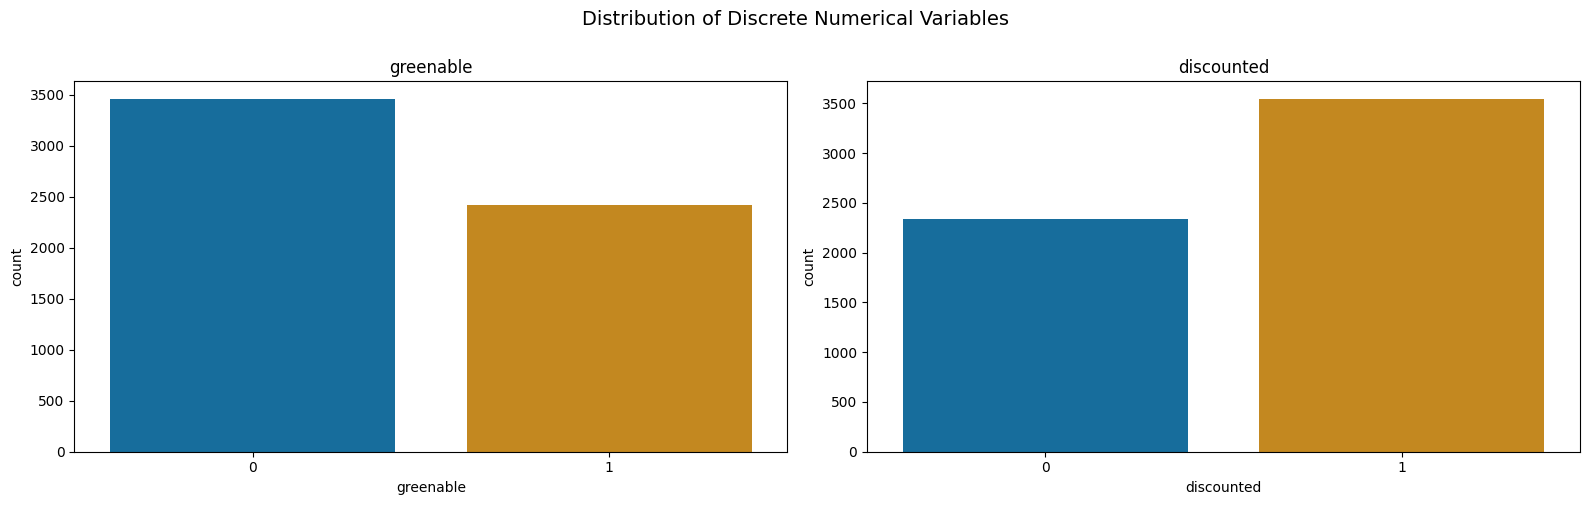

In [36]:
plot_distribution(discrete)

> **OBSERVATION: There is a bit of imbalance in both categories.**

## CATEGORICAL VARIABLES

In [37]:
all_categoricals = all.select_dtypes(object)

In [38]:
all_categoricals

,link,img,product,color,brand,collection,label,gender,product_category,category
0,/en/product/denize-bubble-crepe-dress-sand-bel...,https://static.smallable.com/1686202-648x648q8...,denize bubble crepe dress,sand,bellepiece,ss,dress,w,long dresses,dress_overalls
1,/en/product/cabane-printed-shirt-blue-hartford...,https://static.smallable.com/1588974-648x648q8...,cabane printed shirt,blue,hartford,ss,top,w,long sleeve shirts,top
2,/en/product/garden-striped-cotton-poplin-top-b...,https://static.smallable.com/1677878-648x648q8...,garden striped cotton poplin top,blue,girls of dust,ss,top,w,short sleeve blouses,top
3,/en/product/tsikis-x-alma-deia-exclusive-blava...,https://static.smallable.com/1641315-648x648q8...,tsikis x alma deia exclusive - blava body chain,orange,alma deia,ss,underwear,w,necklaces,jewelry
4,/en/product/peggy-ibiza-striped-dress-yellow-t...,https://static.smallable.com/1669582-648x648q8...,peggy ibiza striped dress,yellow,the label edition,ss,dress,w,long dresses,dress_overalls
...,...,...,...,...,...,...,...,...,...,...
5873,/en/product/ace-organic-cotton-t-shirt-adult-c...,https://static.smallable.com/1295099-648x648q8...,ace organic cotton t-shirt - adult collection,grey,wood wood,fw,top,m,"t-shirts, tops & blouses",top
5874,/en/product/chase-sweatshirt-navy-blue-carhart...,https://static.smallable.com/1297194-648x648q8...,chase sweatshirt,navy blue,carhartt wip,fw,top,m,"sweatshirts, sweaters",jumper
5875,/en/product/coda-jogger-black-avnier-210334,https://static.smallable.com/1181746-648x648q8...,coda jogger,black,avnier,fw,bottom,m,joggers,bottom
5876,/en/product/chase-t-shirt-navy-blue-carhartt-2...,https://static.smallable.com/1204364-648x648q8...,chase t-shirt,navy blue,carhartt wip,fw,top,m,"t-shirts, shirts",top


In [39]:
# check cardinality of each columns
for col in all_categoricals.columns:
    print(f"{col}:", all_categoricals[col].nunique())

link: 5878
img: 5878
product: 4550
color: 374
brand: 261
collection: 2
label: 11
gender: 2
product_category: 99
category: 8


> **NOTE:**
> - We will take only columns with minimal cardinality to plot their distribution(collection, gender, label and category).
>
> - It would also be interesting to see how the distribution vary between the label and category columns, granted they do not have the same number of categories.

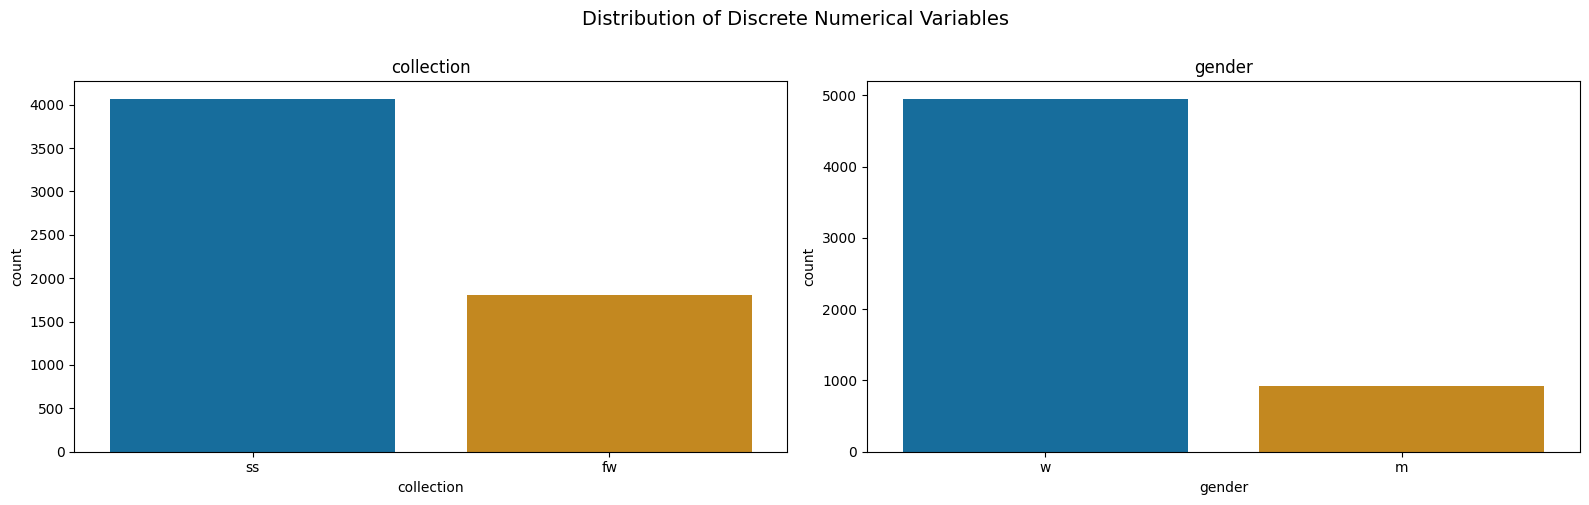

In [40]:
plot_distribution(all_categoricals[['collection', "gender"]])

> **OBSERVATION: There is definitely a huge imbalance between the women's and men's products. Also, as the data scraped in summer, just before the website was updated to include new fall-winter collection, there are more products in the spring-summer collection.**

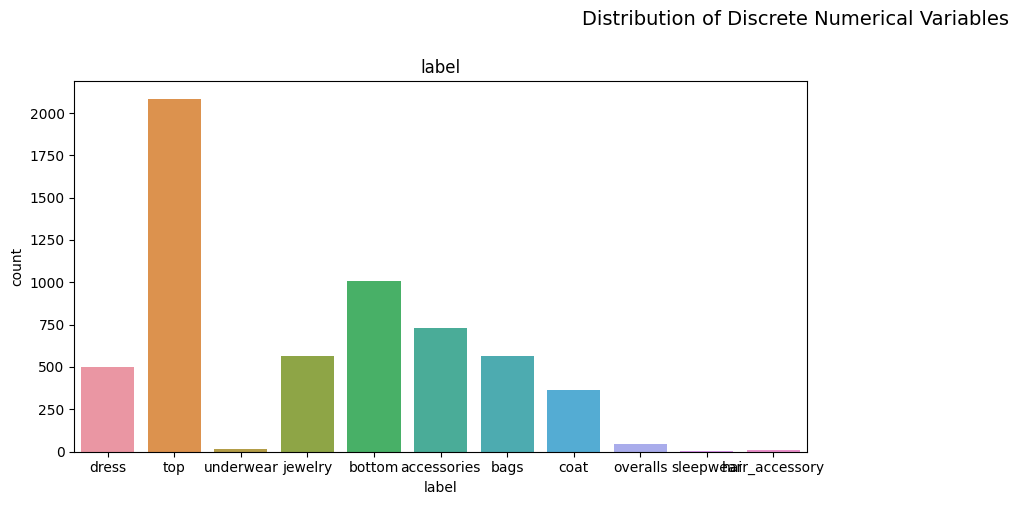

In [41]:
plot_distribution(all_categoricals[['label']])

> **NOTE: After getting labels using information in the product detail column, we see that not many products are in some categories such as underwear, sleepwear, hair accessory and overalls. This is the reason why the generalized category taken from the actual products categories were reduced to 8 labels. Also, overalls such as jumpsuits were joined with dresses.**

In [42]:
all_categoricals.label.value_counts()

label
top               2083
bottom            1006
accessories        728
jewelry            563
bags               563
dress              498
coat               363
overalls            44
underwear           18
hair_accessory      11
sleepwear            1
Name: count, dtype: int64

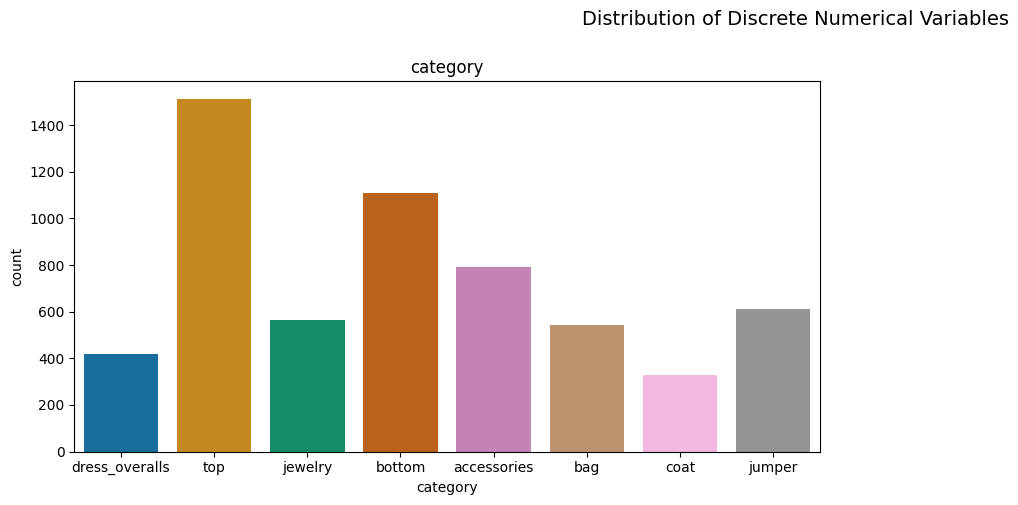

In [43]:
plot_distribution(all_categoricals[['category']])

In [44]:
all_categoricals.category.value_counts()

category
top               1512
bottom            1107
accessories        792
jumper             612
jewelry            564
bag                544
dress_overalls     420
coat               327
Name: count, dtype: int64

> **NOTE: This is as far as we go in exploring the other data taken from smallable since the images will be used in the recommendation process.**